In [ ]:
# happy sad angry neutral

#General Initialization (Run)

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# modify "customized_path_to_project", path of folder in drive, where you have stored your project
customized_path_to_project = "/content/drive/MyDrive/Deep Learning/DL Project"
sys.path.append(customized_path_to_project)

# Data Exploration (Run)

##RAVDESS

In [5]:
Ravdess = os.path.join(customized_path_to_project, "Data", "Ravdees")
ravdess_directory_list = os.listdir(Ravdess)

empty = []
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess+'/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        if int(part[2]) == 3:
          file_emotion.append(int(part[2]))
          file_path.append(Ravdess+'/' + dir + '/' + file)
        elif int(part[2]) == 4:
          file_emotion.append(int(part[2]))
          file_path.append(Ravdess+'/' + dir + '/' + file)
        elif int(part[2]) == 5:
          file_emotion.append(int(part[2]))
          file_path.append(Ravdess+'/' + dir + '/' + file)
        else:
          empty.append(int(part[2]))

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({3:'happy', 4:'sad', 5:'angry'}, inplace=True)
Ravdess_df.head()


,Emotions,Path
0,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
1,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
2,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
3,happy,/content/drive/MyDrive/Deep Learning/DL Projec...
4,happy,/content/drive/MyDrive/Deep Learning/DL Projec...


##TESS

In [6]:
Tess = os.path.join(customized_path_to_project, "Data", "TESS")
tess_directory_list = os.listdir(Tess)

empty = []
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess +'/' + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='happy':
          file_emotion.append('happy')
          file_path.append(Tess+'/' + dir + '/' + file)
        elif part == 'sad':
          file_emotion.append('sad')
          file_path.append(Tess+'/' + dir + '/' + file)
        elif part == 'angry':
          file_emotion.append('angry')
          file_path.append(Tess+'/' + dir + '/' + file)
        else:
          empty.append('Unknown')


# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
1,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
2,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
3,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
4,angry,/content/drive/MyDrive/Deep Learning/DL Projec...


##Concatenate  all three

In [7]:
Total_df = pd.concat([Tess_df,Ravdess_df])
custom_order = ['angry', 'happy', 'sad']
Total_df['Emotions'] = pd.Categorical(Total_df['Emotions'], categories=custom_order, ordered=True)
Total_df.sort_values('Emotions', inplace=True)
Total_df.reset_index(drop=True, inplace=True)
Total_df


,Emotions,Path
0,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
1,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
2,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
3,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
4,angry,/content/drive/MyDrive/Deep Learning/DL Projec...
...,...,...
1771,sad,/content/drive/MyDrive/Deep Learning/DL Projec...
1772,sad,/content/drive/MyDrive/Deep Learning/DL Projec...
1773,sad,/content/drive/MyDrive/Deep Learning/DL Projec...
1774,sad,/content/drive/MyDrive/Deep Learning/DL Projec...


#Data Visualisation and Exploration


In [8]:
Total_df['Emotions'].value_counts()

angry    592
happy    592
sad      592
Name: Emotions, dtype: int64

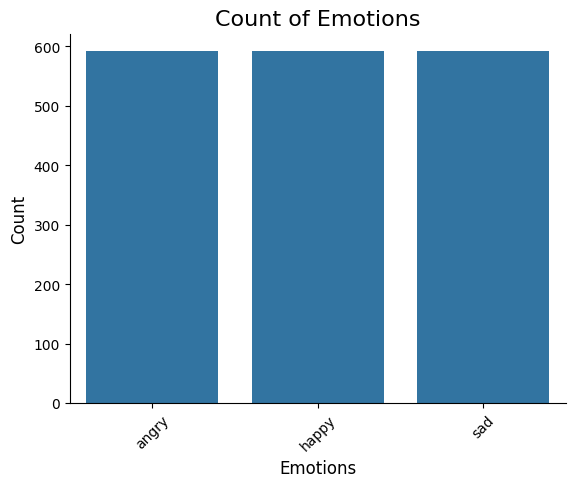

In [ ]:
emotion_counts = Total_df['Emotions'].value_counts()
plt.title('Count of Emotions', size=16)
sn.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sn.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

##Playing audio file and plotting it to look at the output with spectograms

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

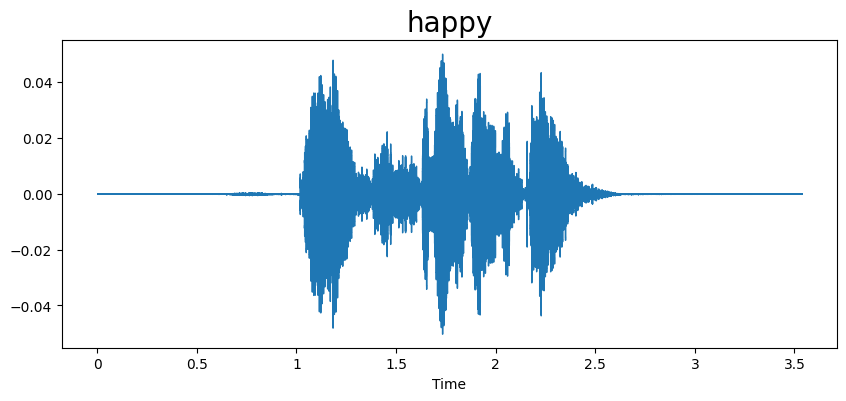

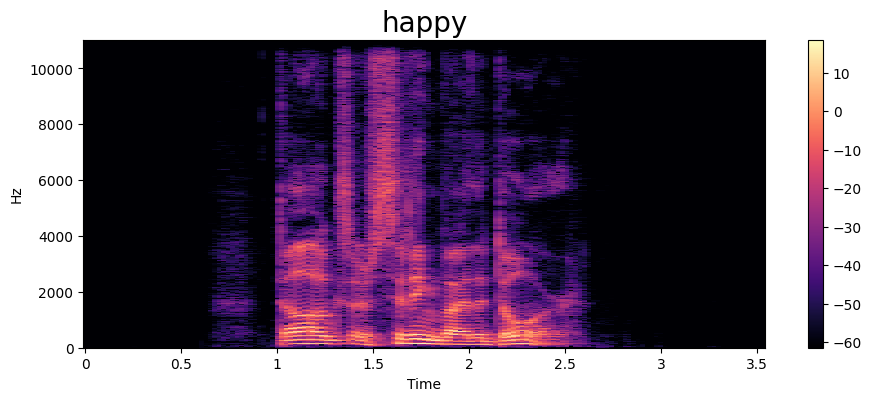

In [ ]:
# Picking a happy track
emotion='happy'
path = np.array(Total_df.Path[Total_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

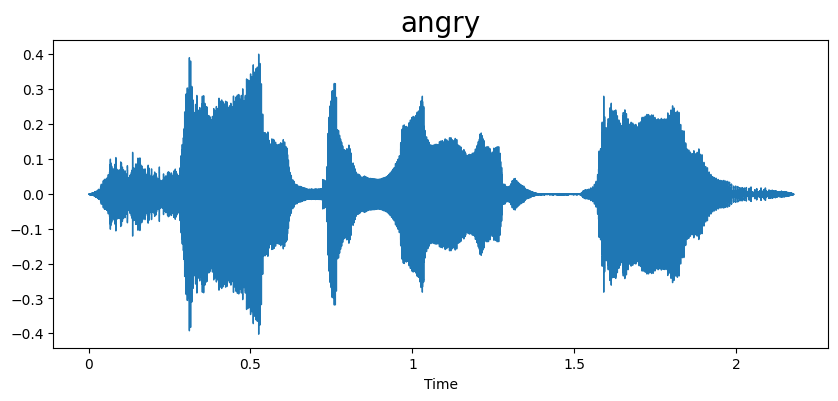

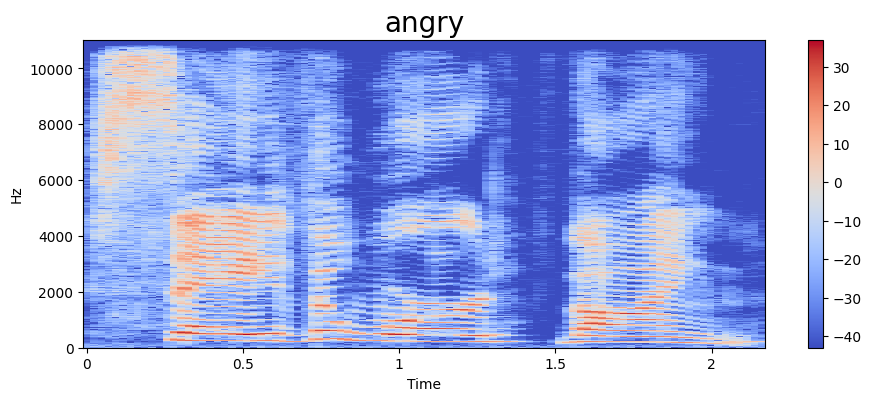

In [ ]:
# Picking a angry track
emotion='angry'
path = np.array(Total_df.Path[Total_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

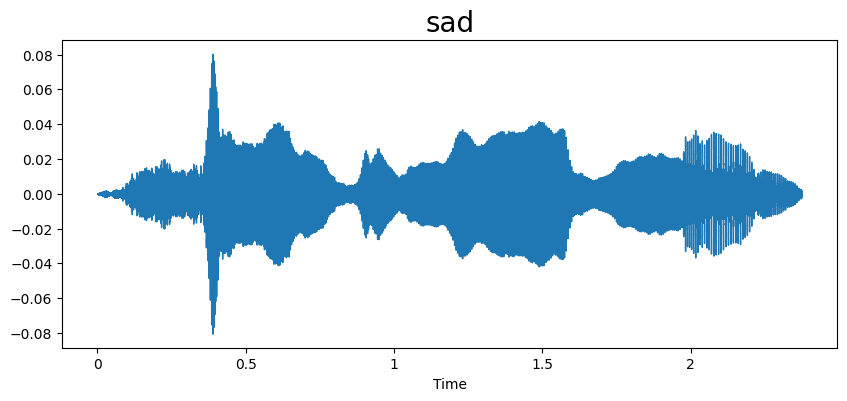

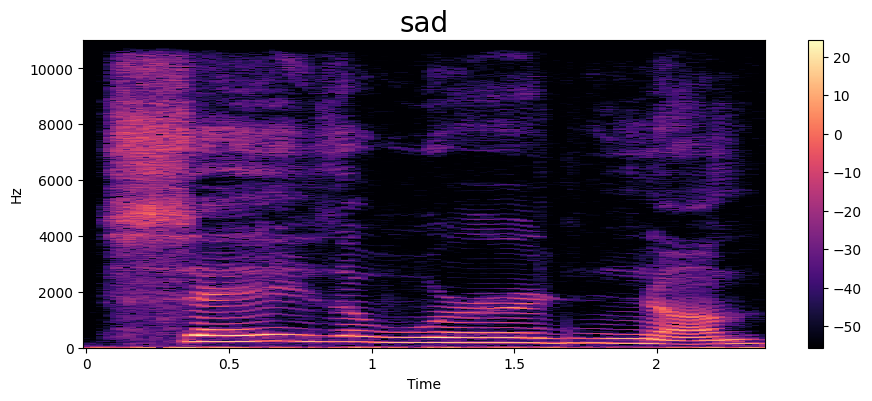

In [ ]:
# Picking a sad track
emotion='sad'
path = np.array(Total_df.Path[Total_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

#Feature extration without noise

In [9]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [10]:
extract_mfcc(Total_df['Path'][0])

array([-4.9329926e+02,  4.4551025e+01,  2.2987690e+00,  1.5117727e+01,
        7.5386815e+00, -2.4091868e-01, -8.6083212e+00,  3.6419172e+00,
       -7.4437299e+00, -2.6465816e+00, -1.4156265e+01,  6.1544609e+00,
       -3.5663602e+00,  4.4708667e+00, -3.6403991e-02,  7.2203488e+00,
        1.2670847e+00, -2.5850372e+00, -1.8050319e+00, -1.2017900e+00,
        5.5473962e+00,  6.0928369e+00,  4.2538023e+00,  1.1065151e+01,
        1.1195440e+01,  1.7032810e+01,  1.4250437e+01,  1.7899054e+01,
        9.7659111e+00,  1.0157589e+01,  7.4066286e+00,  9.5209675e+00,
        8.5933428e+00,  6.1548167e-01,  1.9726628e+00,  1.2506846e+00,
        2.7366283e+00,  7.3733521e+00,  2.2584093e-01,  4.1048474e+00],
      dtype=float32)

In [11]:
X_mfcc = Total_df['Path'].apply(lambda x: extract_mfcc(x))

In [12]:
X_mfcc

0       [-493.29926, 44.551025, 2.298769, 15.117727, 7...
1       [-348.7426, 72.22407, -12.994316, 12.925387, -...
2       [-363.16434, 58.48881, -7.630332, 2.6190138, -...
3       [-361.87497, 46.985825, -7.8305216, 23.247, -2...
4       [-364.7816, 71.546875, -4.522007, 8.519227, -2...
                              ...                        
1771    [-534.19775, 94.42125, 26.79674, 14.134932, 11...
1772    [-552.7234, 104.614395, 41.67392, 12.969337, 2...
1773    [-557.87836, 62.92364, -5.18009, 16.349602, 2....
1774    [-535.3153, 99.29461, 22.303217, 3.2622352, 21...
1775    [-576.6453, 92.2453, 8.875078, 28.963207, 8.78...
Name: Path, Length: 1776, dtype: object

In [13]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1776, 40)

In [14]:
## input split
X = np.expand_dims(X, -1)
X.shape

(1776, 40, 1)

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Total_df[['Emotions']])

In [16]:
y = y.toarray()

In [17]:
y.shape

(1776, 3)

# Split your dataset into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels for both clean and noisy data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, random_state=42)

# Further split the training set into training and validation sets
X_validation, X_test, y_validation, y_test =  train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (355, 40, 1)
y_train shape: (355, 3)
X_validation shape: (710, 40, 1)
y_validation shape: (710, 3)
X_test shape: (711, 40, 1)
y_test shape: (711, 3)


#try model

In [231]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from keras.layers import *
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import Loss
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [234]:
model = Sequential()
model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
model.add(Dense(64))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [235]:
# to train without noise
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=210, batch_size=256, validation_data=(X_validation, y_validation))

Epoch 1/210
2/2 [==============================] - 5s 2s/step - loss: 1.1112 - accuracy: 0.3437 - val_loss: 1.1069 - val_accuracy: 0.3211
Epoch 2/210
2/2 [==============================] - 1s 536ms/step - loss: 1.1080 - accuracy: 0.3775 - val_loss: 1.1009 - val_accuracy: 0.3197
Epoch 3/210
2/2 [==============================] - 1s 433ms/step - loss: 1.1011 - accuracy: 0.3352 - val_loss: 1.0954 - val_accuracy: 0.3169
Epoch 4/210
2/2 [==============================] - 1s 423ms/step - loss: 1.0924 - accuracy: 0.3634 - val_loss: 1.0906 - val_accuracy: 0.3352
Epoch 5/210
2/2 [==============================] - 1s 421ms/step - loss: 1.0845 - accuracy: 0.3775 - val_loss: 1.0861 - val_accuracy: 0.3394
Epoch 6/210
2/2 [==============================] - 1s 415ms/step - loss: 1.0867 - accuracy: 0.3690 - val_loss: 1.0814 - val_accuracy: 0.3606
Epoch 7/210
2/2 [==============================] - 1s 410ms/step - loss: 1.0801 - accuracy: 0.3493 - val_loss: 1.0762 - val_accuracy: 0.3789
Epoch 8/210
2/2 

In [236]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 128)               66560     
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 dropout_109 (Dropout)       (None, 64)                0         
                                                                 
 activation_89 (Activation)  (None, 64)                0         
                                                                 
 dense_90 (Dense)            (None, 32)                2080      
                                                                 
 dropout_110 (Dropout)       (None, 32)                0         
                                                                 
 activation_90 (Activation)  (None, 32)              

In [237]:
# Retrieve the best validation accuracy and the epoch at which it occurred
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_epoch = history.history['val_accuracy'].index(best_val_accuracy)

print("Best Validation Accuracy:", best_val_accuracy)
print("Epoch with Best Validation Accuracy:", best_val_accuracy_epoch + 1)

Best Validation Accuracy: 0.800000011920929
Epoch with Best Validation Accuracy: 207


In [238]:
# Save the model in HDF5 format
model.save('/content/drive/MyDrive/Three.h5')

# Load the model using load_model
# loaded_model = load_model('/content/drive/MyDrive/Deep Learning/DL Project/pkl_files/Noise, MFCC LSTM TESS/Crema_D_kaggle_model_gpt_best_model.h5')


#Plotting the graph

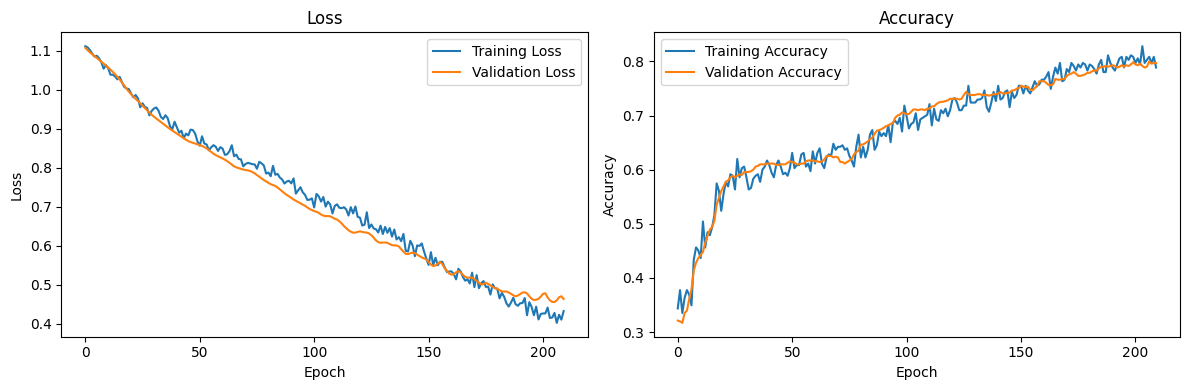

In [239]:
# Get training and validation loss and accuracy from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.set_title('Loss')
ax1.plot(training_loss, label='Training Loss')
ax1.plot(validation_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.set_title('Accuracy')
ax2.plot(training_accuracy, label='Training Accuracy')
ax2.plot(validation_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.savefig('loss_accuracy.png')
plt.show()

#Confusion Matrix

23/23 [==============================] - 1s 42ms/step


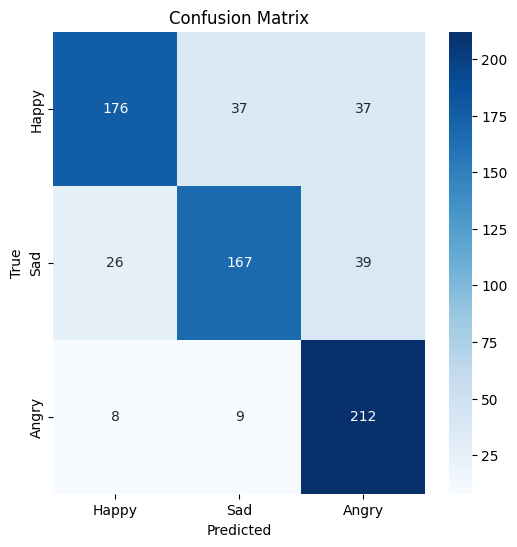

In [246]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 0, 1, 2 with 'Happy', 'Sad', 'Angry' in class labels
class_labels = ['Happy', 'Sad', 'Angry']

# Predictions on the test set
y_pred = model.predict(np.expand_dims(X_test, -1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
